# A Model of Narrative Diffusion

This notebook offers and analysis of results from the proposed narrative diffusion model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load data
data = pd.read_csv("../data/new_model_large_k_20231012140652/results.csv")
data

,agent,timestep,story_item,adopted,prob,Narrative,Social,Trial
0,0,0,0,False,0.507499,0.507499,0.099668,0
1,0,0,1,False,NaN,NaN,NaN,0
2,0,0,2,True,0.510832,0.510832,0.099668,0
3,0,0,3,False,0.539915,0.539915,0.099668,0
4,0,0,4,False,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
220495,49,7,5,True,NaN,NaN,NaN,49
220496,49,7,6,True,NaN,NaN,NaN,49
220497,49,7,7,True,NaN,NaN,NaN,49
220498,49,7,8,True,NaN,NaN,NaN,49


In [19]:
num_agents = len(data.agent.unique())
num_story_items = len(data.story_item.unique())

In [20]:
speed = data.groupby(["timestep","story_item"]).adopted.mean().reset_index()
speed 


,timestep,story_item,adopted
0,0,0,0.4024
1,0,1,0.4180
2,0,2,0.4400
3,0,3,0.4136
4,0,4,0.4032
...,...,...,...
115,11,5,1.0000
116,11,6,1.0000
117,11,7,1.0000
118,11,8,1.0000


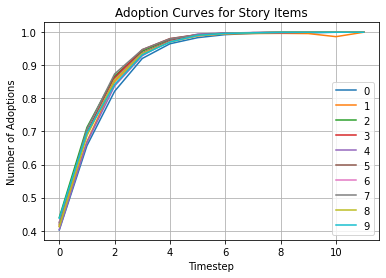

In [21]:
import matplotlib.pyplot as plt
for name, group in speed.groupby('story_item'):
    plt.plot(group['timestep'], group['adopted'], label=name)

plt.legend()
plt.title('Adoption Curves for Story Items')
plt.xlabel('Timestep')
plt.ylabel('Number of Adoptions')
plt.grid(True)
plt.show()

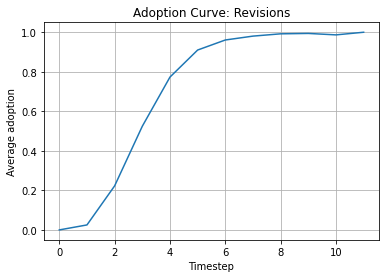

In [22]:
def plot_adoption_speed_overall(data,title="Revisions"):
    item_count = len(data.story_item.unique())
    summary = data.groupby(["Trial","agent","timestep"])['adopted'].sum().reset_index()
    summary["fully_adopted"] = summary.adopted == item_count
    summary = summary.groupby(["Trial","timestep"])['fully_adopted'].mean().reset_index()
    summary = summary.groupby('timestep')['fully_adopted'].mean().reset_index()
    plt.plot(summary['timestep'],summary['fully_adopted'])
    
    plt.title(f'Adoption Curve: {title}')
    plt.xlabel('Timestep')
    plt.ylabel('Average adoption')
    plt.grid(True)
    plt.show()
    
plot_adoption_speed_overall(data)




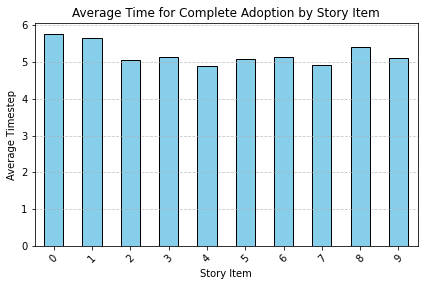

In [23]:


def plot_adoption_speed_items(data):
    num_agents = len(data.agent.unique())
    trials = data.groupby(['Trial','timestep','story_item']).adopted.sum().reset_index()

    completely_adopted = trials[trials['adopted'] ==num_agents]

    # Group by `story_item` and `Trial`, then get the first occurrence for each combination
    first_adoption = completely_adopted.groupby(['story_item', 'Trial']).first().reset_index()

    # Group by `story_item` and compute the mean timestep for each story item
    mx_avg_time_for_adoption = first_adoption.groupby('story_item')['timestep'].mean()

    mx_avg_time_for_adoption.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average Time for Complete Adoption by Story Item')
    plt.xlabel('Story Item')
    plt.ylabel('Average Timestep')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show() 

plot_adoption_speed_items(data)